<a href="https://colab.research.google.com/github/DanaPing/Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ticket symbol?
key executive?

Find in Yahoo finance page:
URL: https://au.finance.yahoo.com/quote/CBA.AX/profile?p=CBA.AX

Company: Commonwealth
ticket symbol: CBA.AX
Key executives:(Find in profile): 


*   Mr. Matthew Comyn	CEO, MD & Exec. Director	3.55M	N/A	1976
*   Mr. Alan Docherty	Group Exec. of Financial Services & CFO	1.54M	N/A	N/A
*   Mr. Pascall Boillat	Chief Information Officer & Group Exec. of Enterprise Services	2.86M	N/A	N/A
*   Ms. Sian Lewis	Group Exec. of HR	1.29M	N/A	N/A
*   Mr. David Antony Keith Cohen B.A., L.L.B.	Deputy Chief Exec. Officer	1.85M	N/A	N/A
*   Mr. Nigel Williams	Group Chief Risk Officer	2.04M	N/A	N/A
*   Ms. Vittoria Annabel June Shortt BMS, CA	Chief Exec. & MD of ASB Bank Ltd.	1.48M	N/A	N/A
*   Mr. Mike Vacy-Lyle	Group Exec. of Bus. & Private Banking	1.69M	N/A	N/A


Get URL: could replace ticket symbol in the url

# Income tax calculation for key executives
ATO tax tables

    Taxable income  Tax on this income

    0 – $18,200         Nil

    $18,201 – $45,000   19 cents for each $1 over $18,200

    $45,001 – $120,000   $5,092 plus 32.5 cents for each $1 over $45,000

    $120,001 – $180,000  $29,467 plus 37 cents for each $1 over $120,000

    $180,001 and over    $51,667 plus 45 cents for each $1 over $180,000

Calculation:
* 0<income<18200  tax = 0
* 18200<=income<45000 tax = (income - 18200)*0.19
* 45001<=income<120000 tax = (income - 45000)*32.5 + 5092
* .....


In [23]:
!pip install kora -q
from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd

In [24]:
def get_url():
  ticker_symbol = input("What is ticker symbol？")
  template = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'
  
  result = template.format(ticker_symbol, ticker_symbol)
  return result


What is ticker symbol？cba.ax


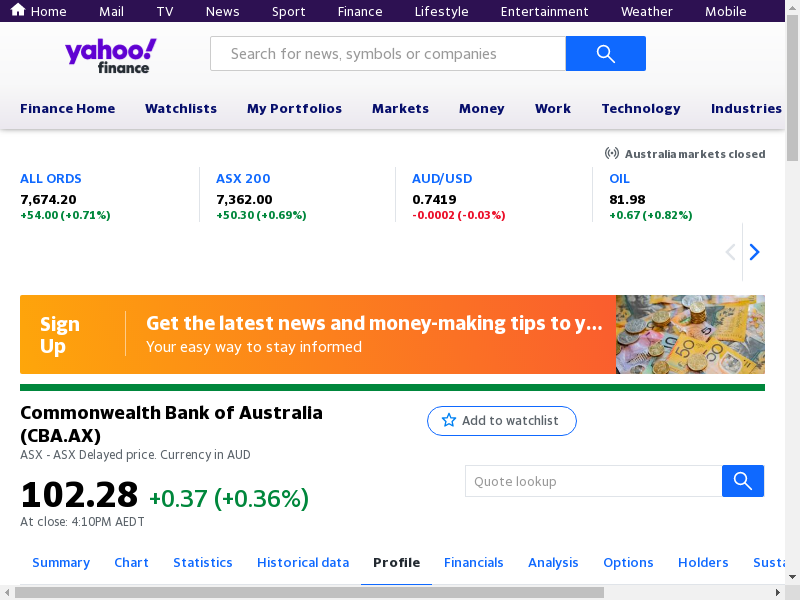

In [36]:
url = get_url()
url
wd.get(url)
wd

In [27]:
def get_cells(row):
  cells = row.find_all('td')
  name = cells[0].text
  title = cells[1].text
  salary = cells[2].text
  return {'name':name, 'title': title, 'salary': salary}

In [29]:
def get_exec_record(soup):
  table = soup.find('table')
  body = table.find('tbody')
  rows = body.find_all('tr')

  exec_records = []
  for row in rows:
    result = get_cells(row)
    exec_records.append(result)
  return exec_records

In [32]:
soup = BeautifulSoup(wd.page_source, "html.parser")
get_exec_record(soup)

[{'name': 'Mr. Matthew  Comyn',
  'salary': '3.55M',
  'title': 'CEO, MD & Exec. Director'},
 {'name': 'Mr. Alan  Docherty',
  'salary': '1.54M',
  'title': 'Group Exec. of Financial Services & CFO'},
 {'name': 'Mr. Pascall  Boillat',
  'salary': '2.86M',
  'title': 'Chief Information Officer & Group Exec. of Enterprise Services'},
 {'name': 'Ms. Sian  Lewis', 'salary': '1.29M', 'title': 'Group Exec. of HR'},
 {'name': 'Mr. David Antony Keith Cohen B.A., L.L.B.',
  'salary': '1.85M',
  'title': 'Deputy Chief Exec. Officer'},
 {'name': 'Mr. Nigel  Williams',
  'salary': '2.04M',
  'title': 'Group Chief Risk Officer'},
 {'name': 'Ms. Vittoria Annabel June Shortt BMS, CA',
  'salary': '1.48M',
  'title': 'Chief Exec. & MD of ASB Bank Ltd.'},
 {'name': 'Mr. Mike  Vacy-Lyle',
  'salary': '1.69M',
  'title': 'Group Exec. of Bus. & Private Banking'},
 {'name': 'Hanh  Nguyen',
  'salary': 'N/A',
  'title': 'Chief Representative and Director of Investment & Banking'},
 {'name': 'Melanie  Kirk',

In [33]:
def exec_salary(rec):
  salary = rec['salary']
  last_char = salary[-1]
  number = salary[0:-1]
  if last_char == "M":
    salary_exec = float(number)*1000000
  elif last_char == "k":
    salary_exec = float(number)*1000
  else:
    salary_exec = 0

  return salary_exec

In [34]:
def tax_calculation(income):
  if income <= 18200:
    tax_pay = 0
  elif 18201 <= income <= 45000:
    tax_pay = 0.19 * (income - 18200)
  elif 45001 <= income < 120000:
    tax_pay = 5092 + 0.32 * (income - 45000)
  elif 120001 <= income < 180000:
    tax_pay = 29467 + 0.37 * (income - 120000)
  elif income >= 180001:
    tax_pay = 51667 + 0.45 * (income - 180000)


  return tax_pay

In [35]:
#get url
url = get_url()
wd.get(url)#get yahoo finance page
soup = BeautifulSoup(wd.page_source, "html.parser")
records = get_exec_record(soup) # return all executive name, title, salary
#get executive income
for record in records: # for each executive
  result = exec_salary(record)#get all salary from records
  income_tax = tax_calculation(result)#use as input to calculate tax
  record['tax'] = income_tax# add calculated tax into 'tax' column
#pandas dataframe
exec_df = pd.DataFrame.from_records(records)
exec_df

What is ticker symbol？cba.ax


,name,title,salary,tax
0,Mr. Matthew Comyn,"CEO, MD & Exec. Director",3.55M,1568167.0
1,Mr. Alan Docherty,Group Exec. of Financial Services & CFO,1.54M,663667.0
2,Mr. Pascall Boillat,Chief Information Officer & Group Exec. of Ent...,2.86M,1257667.0
3,Ms. Sian Lewis,Group Exec. of HR,1.29M,551167.0
4,"Mr. David Antony Keith Cohen B.A., L.L.B.",Deputy Chief Exec. Officer,1.85M,803167.0
5,Mr. Nigel Williams,Group Chief Risk Officer,2.04M,888667.0
6,"Ms. Vittoria Annabel June Shortt BMS, CA",Chief Exec. & MD of ASB Bank Ltd.,1.48M,636667.0
7,Mr. Mike Vacy-Lyle,Group Exec. of Bus. & Private Banking,1.69M,731167.0
8,Hanh Nguyen,Chief Representative and Director of Investmen...,N/A,0.0
9,Melanie Kirk,Head of Investor Relations,N/A,0.0
